In [1]:
#!pip install qiskit
import qiskit as qk
from qiskit import IBMQ,Aer
from qiskit import *
from math import pi
from qiskit.visualization import plot_bloch_vector
from qiskit.visualization import plot_bloch_multivector

from qiskit import QuantumCircuit, QuantumRegister, Aer, execute
# import basic plot tools
from qiskit.visualization import plot_histogram
from qiskit_textbook.tools import simon_oracle
from qiskit.providers.ibmq import least_busy

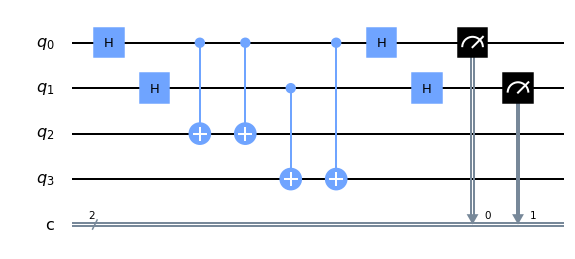

In [3]:
b = '11'
n = len(b)
simon_circuit_2 = QuantumCircuit(n*2, n)

# Apply Hadamard gates before querying the oracle
simon_circuit_2.h(range(n))

# Query oracle
simon_circuit_2 += simon_oracle(b)

# Apply Hadamard gates to the input register
simon_circuit_2.h(range(n))

# Measure qubits
simon_circuit_2.measure(range(n), range(n))
simon_circuit_2.draw(output='mpl',justify='none')

In [ ]:
# Load our saved IBMQ accounts and get the least busy backend device with less than or equal to 5 qubits
import Qconfig_IBMQ_experience
IBMQ.save_account(Qconfig_IBMQ_experience.APItoken, overwrite=True)
IBMQ.load_account()

provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= n and 
                                   not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", backend)

# Execute and monitor the job
from qiskit.tools.monitor import job_monitor
shots = 1024
job = execute(simon_circuit_2, backend=backend, shots=shots, optimization_level=3)
job_monitor(job, interval = 2)

# Get results and plot counts
device_counts = job.result().get_counts()
plot_histogram(device_counts)

ibmqfactory.load_account:WARNING:2020-11-05 11:22:49,666: Credentials are already in use. The existing account in the session will be replaced.


least busy backend:  ibmq_valencia
Job Status: job is queued (5)     